## importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## selecting the dataset

In [2]:
dataset = pd.read_csv('../input/nyse/prices.csv')
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
# checking for null values
dataset.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [4]:
# Checking information of feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [5]:
# describing the dataset
dataset.describe(include='all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,3524,501,NaN,NaN,NaN,NaN,NaN
top,2016-06-01,KMX,NaN,NaN,NaN,NaN,NaN
freq,498,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,NaN,NaN,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,NaN,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,NaN,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,NaN,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,NaN,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06


In [6]:
# checking for shape
dataset.shape

(851264, 7)

In [7]:
# printing all unique values
dataset.nunique()

date        3524
symbol       501
open       72707
close      73628
low        72900
high       73299
volume    171073
dtype: int64

In [8]:
# printing first 10 symbols
symbols = list(dataset.symbol.unique())
symbols[:10]

['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI']

## Filtering out the dataset
Our aim will be limited to predicting **Apple, Google, Facebook, and Amazon** stocks. Ticker symbol for the respective companies are AAPL, GOOGL FB, and AMZN.

In [9]:
print("Number of Apples stocks: ", dataset[dataset['symbol'] == 'AAPL'].shape)
print("Number of Googles stocks: ", dataset[dataset['symbol'] =='GOOGL'].shape)
print("Number of Amazons stocks: ", dataset[dataset['symbol'] == 'AMZN'].shape)

Number of Apples stocks:  (1762, 7)
Number of Googles stocks:  (1762, 7)
Number of Amazons stocks:  (1762, 7)


Now we will create new dataframe in which only apples, googles, facebooks, and amazons stocks are avalible.

In [10]:
prediction_dataset = dataset[(dataset['symbol'] == 'AAPL') | (dataset['symbol'] == 'GOOGL') | (dataset['symbol'] == 'AMZN')].reset_index(drop = True)
prediction_dataset

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
3,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
4,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
...,...,...,...,...,...,...,...
5281,2016-12-29,AMZN,772.400024,765.150024,760.849976,773.400024,3153500.0
5282,2016-12-29,GOOGL,802.330017,802.880005,798.140015,805.750000,1056500.0
5283,2016-12-30,AAPL,116.650002,115.820000,115.430000,117.199997,30586300.0
5284,2016-12-30,AMZN,766.469971,749.869995,748.280029,767.400024,4125300.0


### Strating and ending date

In [11]:
print('minimum date is:', prediction_dataset.date.min())
print('maximum date is:', prediction_dataset.date.max())

minimum date is: 2010-01-04
maximum date is: 2016-12-30


### One hot encode the symbol column

In [12]:
prediction_dataset = pd.get_dummies(prediction_dataset, columns=['symbol'])
prediction_dataset.head()

,date,open,close,low,high,volume,symbol_AAPL,symbol_AMZN,symbol_GOOGL
0,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0,1,0,0
1,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,0,1,0
2,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0,0,0,1
3,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0,1,0,0
4,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,0,1,0


#### Printing tabular information about dataset

In [13]:
from tabulate import tabulate
info = [[col, prediction_dataset[col].count(), prediction_dataset[col].max(), prediction_dataset[col].min()] for col in prediction_dataset.columns]
print(tabulate(info, headers=['Feature', 'Count', 'Max','Min'], tablefmt='orgtbl'))

| Feature      |   Count | Max                | Min        |
|--------------+---------+--------------------+------------|
| date         |    5286 | 2016-12-30         | 2010-01-04 |
| open         |    5286 | 1226.800064        | 90.0       |
| close        |    5286 | 1220.1699820000001 | 90.279999  |
| low          |    5286 | 1218.6000199999999 | 89.470001  |
| high         |    5286 | 1228.8800130000002 | 90.699997  |
| volume       |    5286 | 470249500.0        | 520600.0   |
| symbol_AAPL  |    5286 | 1                  | 0          |
| symbol_AMZN  |    5286 | 1                  | 0          |
| symbol_GOOGL |    5286 | 1                  | 0          |


## Exploratory data analysis

In [14]:
prediction_dataset.head()

,date,open,close,low,high,volume,symbol_AAPL,symbol_AMZN,symbol_GOOGL
0,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0,1,0,0
1,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,0,1,0
2,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0,0,0,1
3,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0,1,0,0
4,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,0,1,0


In [15]:
prediction_dataset = prediction_dataset.drop('date', axis = 1)

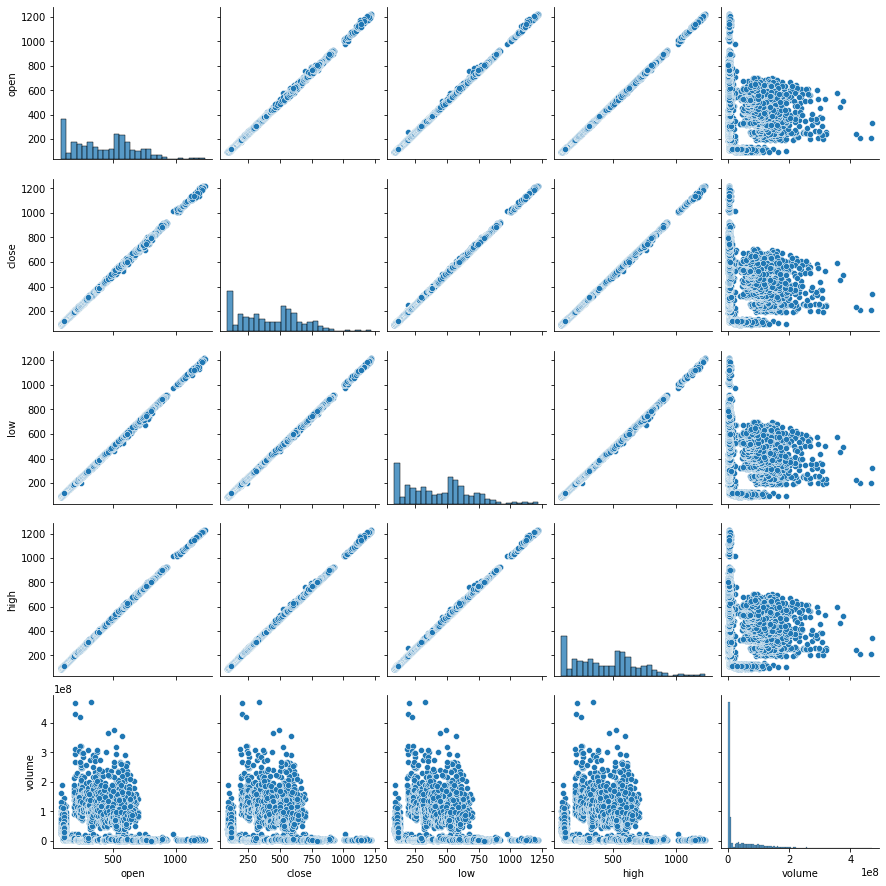

In [16]:
sns.pairplot(prediction_dataset.drop(['symbol_AAPL', 'symbol_GOOGL', 'symbol_AMZN'], axis = 1))

<AxesSubplot:>

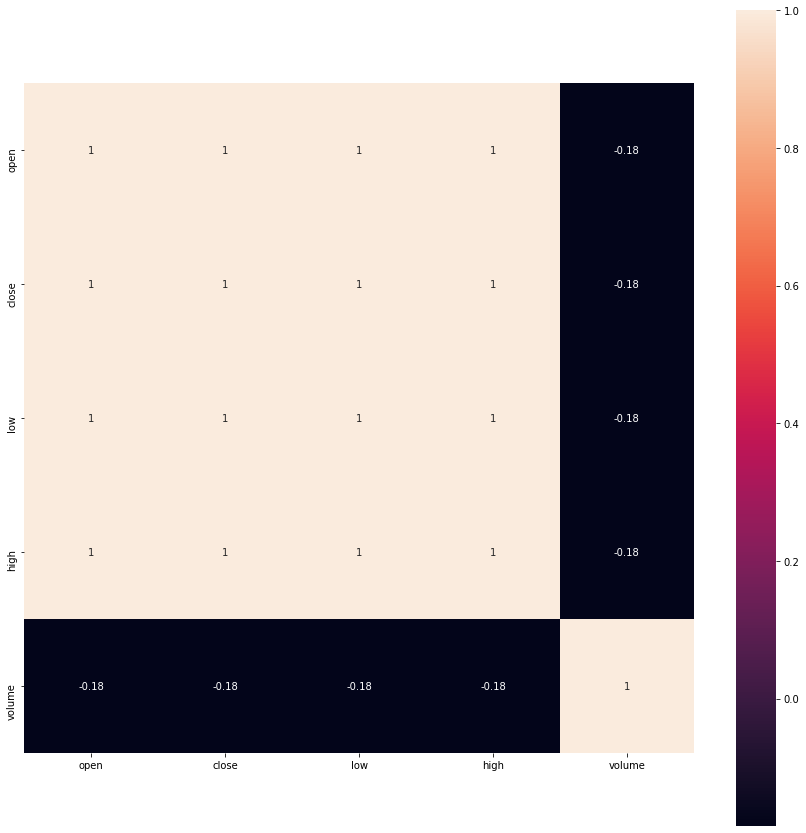

In [17]:
# Correlation matrix
plt.figure(figsize=(15, 15))
correlation = prediction_dataset.drop(['symbol_AAPL', 'symbol_GOOGL', 'symbol_AMZN'], axis = 1).corr()
sns.heatmap(correlation, annot=True, square = True)

In [18]:
info = ['open', 'high']

### comparing stocks with info

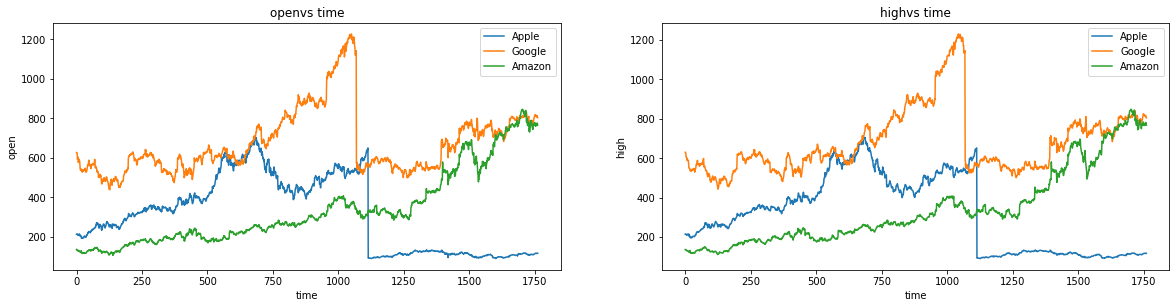

In [19]:
plt.figure(figsize=(20, 10))

for i in range(2):
    plt.subplot(2, 2, i+1)
    
    plt.plot(prediction_dataset[prediction_dataset['symbol_AAPL'] == 1][info[i]].values)
    plt.plot(prediction_dataset[prediction_dataset['symbol_GOOGL'] == 1][info[i]].values)
    plt.plot(prediction_dataset[prediction_dataset['symbol_AMZN'] == 1][info[i]].values)
    plt.xlabel('time')
    plt.ylabel(info[i])
    plt.legend(['Apple', 'Google', 'Amazon'])
    plt.title(info[i] + 'vs time')
    
plt.show()

Since open price, low price, and high price are linearly correlated with closing price, only one of them will be selected to feed the model, to avoid overfitting. And the second feature will be volume traded.

In [20]:
info = [[col, prediction_dataset[col].count(), prediction_dataset[col].max(), prediction_dataset[col].min()] for col in prediction_dataset.columns]
print(tabulate(info, headers = ['Feature', 'Maximum', 'Minimum'], tablefmt='orgtbl'))

|              |   Feature |       Maximum |   Minimum |
|--------------+-----------+---------------+-----------|
| open         |      5286 | 1226.8        |     90    |
| close        |      5286 | 1220.17       |     90.28 |
| low          |      5286 | 1218.6        |     89.47 |
| high         |      5286 | 1228.88       |     90.7  |
| volume       |      5286 |    4.7025e+08 | 520600    |
| symbol_AAPL  |      5286 |    1          |      0    |
| symbol_AMZN  |      5286 |    1          |      0    |
| symbol_GOOGL |      5286 |    1          |      0    |


## Create the dataset

We will use past 300 days data to predict future stock prices, 100 days of stock data for each company. We will use three fields, apart from opening price and volume traded to symbolize the company to which the data belongs to.


In [21]:
X = np.array(prediction_dataset.drop(['close', 'low', 'high'], axis = 1))
y = np.array(prediction_dataset['close'])

In [22]:
print(X.shape)
print(y.shape)

(5286, 5)
(5286,)


## Scaling the columns

In [23]:
X[:3]

array([[2.13429998e+02, 1.23432400e+08, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.36250000e+02, 7.59990000e+06, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [6.26950006e+02, 3.90840000e+06, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [25]:
print(X.min())
print(X.max())

0.0
1.0


In [26]:
temp = MinMaxScaler().fit_transform(np.reshape(y, (len(y), 1)))
y = temp.reshape(-1)

In [27]:
print(y.min())
print(y.max())

0.0
1.0


 ## Creating the actual time series based numpy array

An important point to note is that we will have 1 outputs or target labels in y. These are the 1 closing prices, for AMAZN


In [28]:
length = 300    # 100 days * 1 companies
X_res = []
y_res = []
for i in range(length, len(X)-2):
    X_res.append(X[i-length:i])  # cntains features from past 100 days for 4 companies
    y_res.append(y[i:i+3])  # next three closing prices for apple, google, and amazon

X_res = np.array(X_res)
y_res = np.array(y_res)

In [29]:
print(X_res.shape)
print(y_res.shape)

(4984, 300, 5)
(4984, 3)


## Train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state = 42, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3488, 300, 5)
(1496, 300, 5)
(3488, 3)
(1496, 3)


## Weights and Baises login

In [31]:
%%capture
!pip install wandb -upgrade
import wandb
from wandb.keras import WandbCallback

In [32]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient() 

personal_key_for_api = user_secrets.get_secret("wandb-key")

! wandb login $personal_key_for_api

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


#### Experiment name

In [33]:
experiment_name = wandb.util.generate_id()

#### Start a run tracking hyperparameters

In [34]:
wandb.init(
    project='NYSE Stock Price prediction V-1',
    group = experiment_name,
    config={
        'activation_1':'tanh',
        'dropout':0.2,
        'optimizer':'adam',
        'loss':'mean_squared_error',
        'metrics':'accuracy',
        'layer_1':128,
        'layer_2':128,
        'layer_3':32,
        'activation_2':'linear',
        'batch_size':32,
        'epoch':50  
    })
config = wandb.config

wandb: Currently logged in as: rahulk (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.30 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [35]:
config.keys

<bound method Config.keys of {'activation_1': 'tanh', 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'mean_squared_error', 'metrics': 'accuracy', 'layer_1': 128, 'layer_2': 128, 'layer_3': 32, 'activation_2': 'linear', 'batch_size': 32, 'epoch': 50}>

## Model creation

### Recurrent Neural Network

Vanilla neural networks do not have a memory and so they do not take into account any past event for predictions. But this kind of model is poor when working with time series data, where there is dependency accross time. This is where RNN come in. A RNN model has memory, which can help in retaining past data and so the predictions are made on those basis.

### Long Short Term Memory

Simple RNN models have a short term memory and are not able to retain dependencies that occured long before the current state. So LSTM or long short term memory is used to retain those dependencies as well, using something called gated units. More info can be found here.


In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Flatten

from keras.layers import Input

In [37]:
def lstm_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(LSTM(hiddenx, activation = config.activation_1, return_sequences = True))
    model.add(BatchNormalization())
    model.add(Dropout(config.dropout))
    
    return model

In [38]:
def rnn (hidden1, hidden2, hidden3) :
    
    model = Sequential()
    
    # Input Block
    model.add(Input((length, 5,)))
    
    # LSTM Block
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(LSTM(hidden3, activation = config.activation_1, return_sequences = False))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output Block
    model.add(Dense(3, activation = config.activation_2))
    
    model.compile(loss = config.loss, optimizer = config.optimizer, metrics= [config.metrics])
    return model


In [39]:
model = rnn(config.layer_1, config.layer_2, config.layer_3)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 300, 128)          69120     
_________________________________________________________________
sequential_2 (Sequential)    (None, 300, 128)          132096    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 222,051
Trainable params: 221,475
Non-trainable params: 576
________________________________________________

### Creating cheackpoint for best model

In [40]:
import tensorflow as tf
import os

In [41]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.list_physical_devices("GPU")
print(gpus)
if len(gpus) == 1 : 
    strategy = tf.distribute.OneDeviceStrategy(device = "/gpu:0")
else:
    strategy = tf.distribute.MirroredStrategy()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [42]:
from keras.callbacks import ModelCheckpoint
checkpo = ModelCheckpoint('/result_model.h5', monitor = 'val_loss', save_best_only=True, verbose=1)

In [43]:
with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train, epochs=config.epoch, batch_size = config.batch_size, validation_data = (X_test, y_test), callbacks=[checkpo, WandbCallback()])

Epoch 1/50
109/109 [==============================] - 15s 72ms/step - loss: 0.8023 - accuracy: 0.3703 - val_loss: 0.0473 - val_accuracy: 0.3456

Epoch 00001: val_loss improved from inf to 0.04733, saving model to /result_model.h5
Epoch 2/50
109/109 [==============================] - 6s 53ms/step - loss: 0.3376 - accuracy: 0.4519 - val_loss: 0.0450 - val_accuracy: 0.3944

Epoch 00002: val_loss improved from 0.04733 to 0.04502, saving model to /result_model.h5
Epoch 3/50
109/109 [==============================] - 6s 55ms/step - loss: 0.2318 - accuracy: 0.4983 - val_loss: 0.0492 - val_accuracy: 0.3369

Epoch 00003: val_loss did not improve from 0.04502
Epoch 4/50
109/109 [==============================] - 6s 54ms/step - loss: 0.1684 - accuracy: 0.4984 - val_loss: 0.0462 - val_accuracy: 0.6457

Epoch 00004: val_loss did not improve from 0.04502
Epoch 5/50
109/109 [==============================] - 6s 52ms/step - loss: 0.1214 - accuracy: 0.5907 - val_loss: 0.0296 - val_accuracy: 0.7714

Epo

### Loss vs Epochs

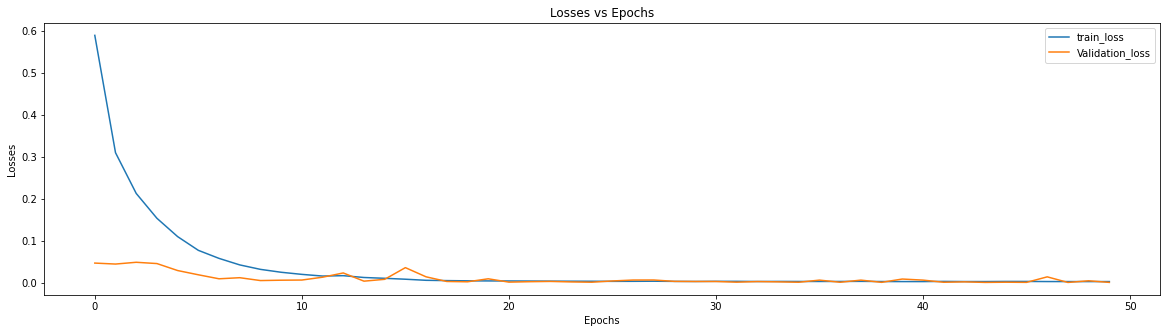

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'Validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')
plt.show()

### Model Prediction

In [47]:
predict = model.predict(X_test)
print(predict.shape)

(1496, 3)


## Performance Metrics

**Mean Squared Error**

Sum of squares of differences between actual value and predicted value, divided by the total number of samples. This is an absolute measure.

**R-squared score**

Basically this metric evaluates how well the model performs compared to predicting mean for every sample. This is a relative measure.


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error :", str(mean_squared_error(predict, y_test)))
print("r2 squared error :", str(r2_score(predict, y_test)))

Mean squared error : 0.0013917381308696422
r2 squared error : 0.9656031298539345


## Plot the prediction and test value

Text(0.5, 1.0, 'Comparison in closing prices for Google')

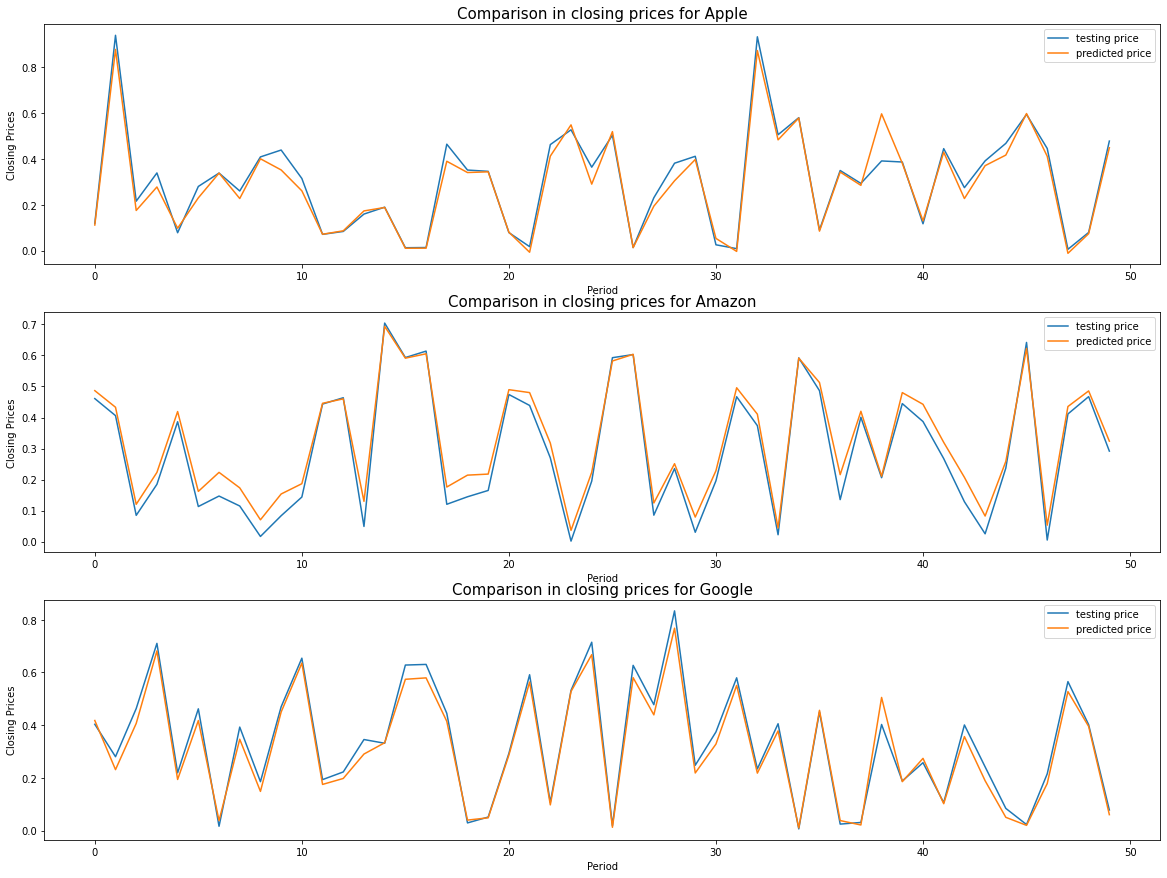

In [50]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.plot(y_test[:50, 0])
plt.plot(predict[:50, 0])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Apple', fontsize = 15)


plt.subplot(3,1,2)
plt.plot(y_test[:50,1])
plt.plot(predict[:50,1])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Amazon',fontsize = 15)


plt.subplot(3,1,3)
plt.plot(y_test[:50,2])
plt.plot(predict[:50,2])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Google',fontsize = 15)

In [58]:
model.save('stock_predict_1.h5')

In [60]:
saved_model = tf.keras.models.load_model('stock_predict_1.h5')

In [62]:
saved_predict = saved_model.predict(X_test)

In [63]:
r2_score(saved_predict, y_test)

0.9656031298539345